# Introdução a séries temporais

Uma série temporal é um conjunto de observações de uma variável ao longo do tempo.

Alguns exemplos de séries temporais:

- Temperatura registrada ao longo do ano em uma cidade;
- Faturamento das vendas de sorvete ao longo do ano;
- Valores de emissão de CO2 em uma cidade;
- Preço das ações de determinada companhia;
- Número de acidentes ocorridos em uma rodovia durante um mês.

Algumas características:

- Autocorrelação;
- Tendência;
- Sazonalidade.

<img src="https://i1.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/series-temporais-2-1024x644.png?resize=1024%2C644" alt="Número de passageiros x tempo" style="width: 600px;"/>

# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Importando dados de COVID-19

Dados extraídos do [Our World in Data](https://ourworldindata.org/coronavirus-data). Mais detalhes no repositório: https://github.com/owid/covid-19-data/tree/master/public/data

In [2]:
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71289,ZWE,Africa,Zimbabwe,2021-02-21,35796.0,28.0,89.143,1436.0,4.0,5.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71290,ZWE,Africa,Zimbabwe,2021-02-22,35862.0,66.0,91.429,1441.0,5.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71291,ZWE,Africa,Zimbabwe,2021-02-23,35910.0,48.0,85.000,1448.0,7.0,4.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
71292,ZWE,Africa,Zimbabwe,2021-02-24,35960.0,50.0,76.714,1456.0,8.0,5.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


## Manipulando tipos das colunas

In [4]:
df.date = pd.to_datetime(df.date)

## Filtrando apenas os dados do Brasil

In [5]:
brasil = df[df.location == 'Brazil']

In [6]:
brasil.reset_index(drop=True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
1,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
2,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
3,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
4,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,BRA,South America,Brazil,2021-02-21,10168174.0,29026.0,47665.857,246504.0,527.0,1037.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
362,BRA,South America,Brazil,2021-02-22,10195160.0,26986.0,46921.429,247143.0,639.0,1052.857,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
363,BRA,South America,Brazil,2021-02-23,10257875.0,62715.0,47984.857,248529.0,1386.0,1084.143,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
364,BRA,South America,Brazil,2021-02-24,10324463.0,66588.0,49388.000,249957.0,1428.0,1123.857,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


## Selecionando colunas

In [7]:
brasil = brasil[['date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths']]

In [8]:
brasil

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths
9161,2020-02-26,1.0,1.0,NaN,NaN,NaN
9162,2020-02-27,1.0,0.0,NaN,NaN,NaN
9163,2020-02-28,1.0,0.0,NaN,NaN,NaN
9164,2020-02-29,2.0,1.0,NaN,NaN,NaN
9165,2020-03-01,2.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
9522,2021-02-21,10168174.0,29026.0,47665.857,246504.0,527.0
9523,2021-02-22,10195160.0,26986.0,46921.429,247143.0,639.0
9524,2021-02-23,10257875.0,62715.0,47984.857,248529.0,1386.0
9525,2021-02-24,10324463.0,66588.0,49388.000,249957.0,1428.0


## Preenchendo valores nulos

In [9]:
brasil = brasil.fillna(0)

In [10]:
brasil

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths
9161,2020-02-26,1.0,1.0,0.000,0.0,0.0
9162,2020-02-27,1.0,0.0,0.000,0.0,0.0
9163,2020-02-28,1.0,0.0,0.000,0.0,0.0
9164,2020-02-29,2.0,1.0,0.000,0.0,0.0
9165,2020-03-01,2.0,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...
9522,2021-02-21,10168174.0,29026.0,47665.857,246504.0,527.0
9523,2021-02-22,10195160.0,26986.0,46921.429,247143.0,639.0
9524,2021-02-23,10257875.0,62715.0,47984.857,248529.0,1386.0
9525,2021-02-24,10324463.0,66588.0,49388.000,249957.0,1428.0


## Plotando gráficos das variáveis ao longo do tempo

In [11]:
new_cases = brasil[['date', 'new_cases']]
new_cases.set_index('date', inplace=True)

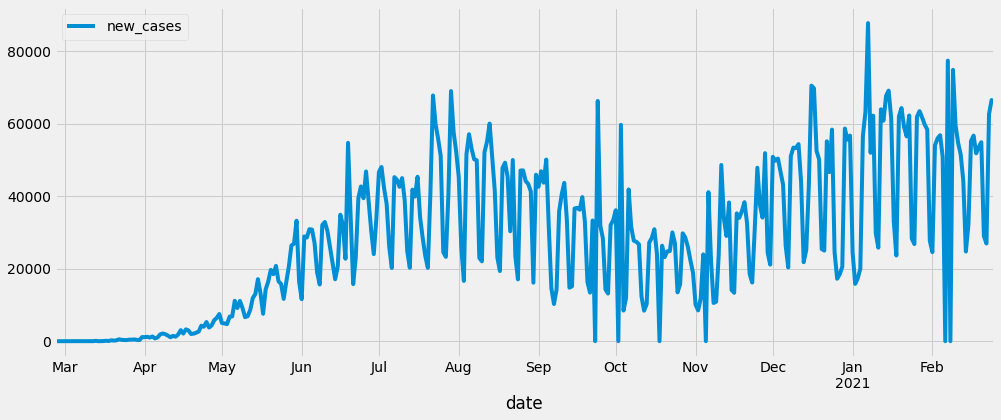

In [12]:
new_cases.plot(figsize=(15, 6))
plt.show()

In [13]:
new_cases_smoothed = brasil[['date', 'new_cases_smoothed']]
new_cases_smoothed.set_index('date', inplace=True)

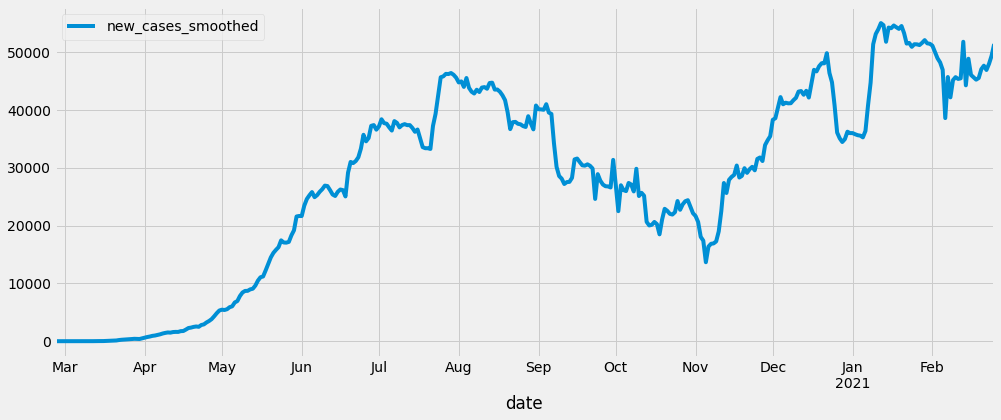

In [14]:
new_cases_smoothed.plot(figsize=(15,6))
plt.show()

In [15]:
total_cases = brasil[['date', 'total_cases']]
total_cases.set_index('date', inplace=True)

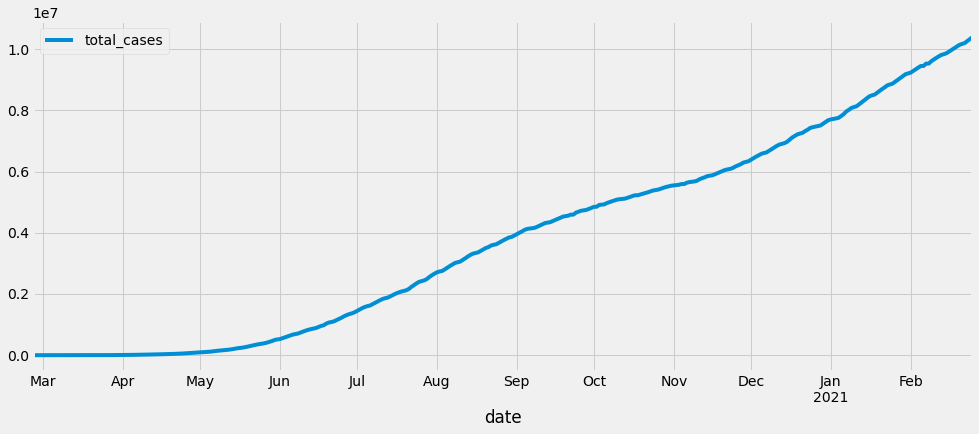

In [16]:
total_cases.plot(figsize=(15,6))
plt.show()

In [17]:
new_deaths = brasil[['date', 'new_deaths']]
new_deaths.set_index('date', inplace=True)

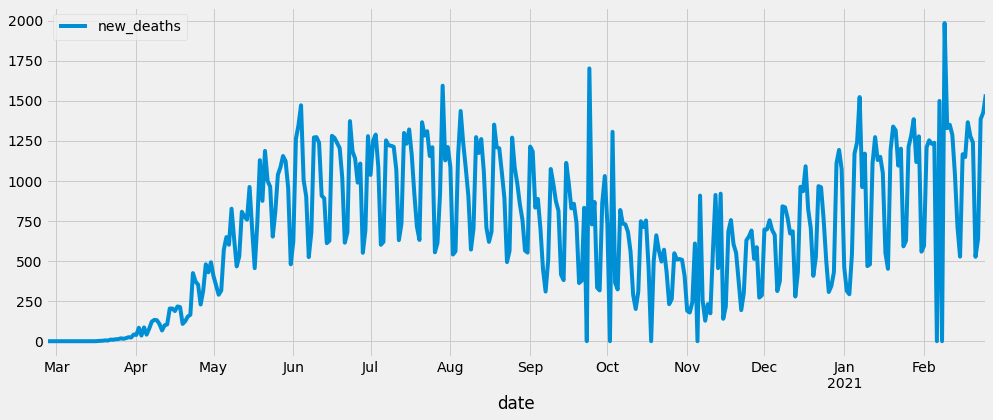

In [18]:
new_deaths.plot(figsize=(15,6))
plt.show()

In [19]:
total_deaths = brasil[['date', 'total_deaths']]
total_deaths.set_index('date', inplace=True)

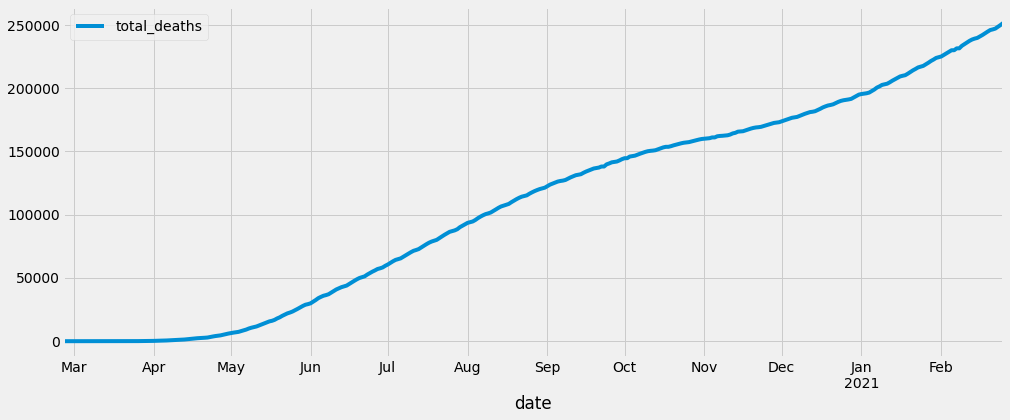

In [20]:
total_deaths.plot(figsize=(15,6))
plt.show()

# Tornando a série estacionária

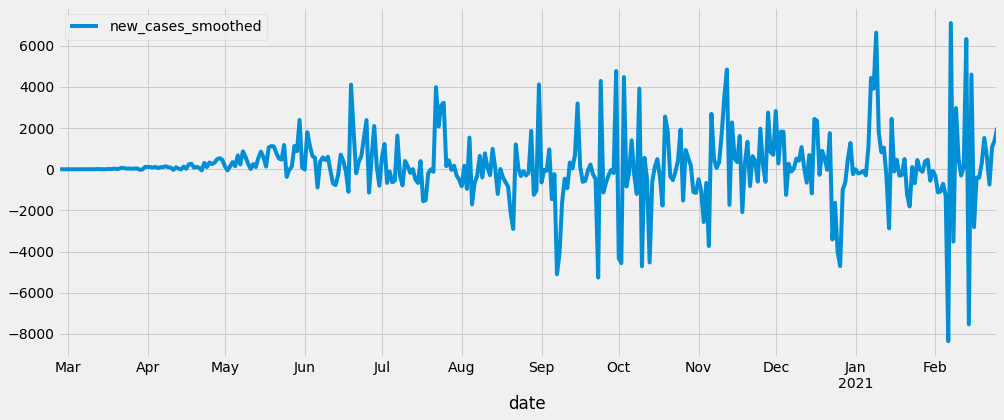

In [21]:
new_cases_diff = new_cases_smoothed.diff()
new_cases_diff.plot(figsize=(15,6))
plt.show()

In [22]:
new_cases_diff.drop(index=pd.to_datetime('2020-02-26'), axis=0, inplace=True)
new_cases_diff

,new_cases_smoothed
date,
2020-02-27,0.000
2020-02-28,0.000
2020-02-29,0.000
2020-03-01,0.000
2020-03-02,0.286
...,...
2021-02-21,609.571
2021-02-22,-744.428
2021-02-23,1063.428


## Teste Dickey-Fuller Aumentado

- H0: A série temporal é não-estacionária
- H1: A série temporal é estacionária



- **p-value > 0.05**: aceitamos a hipótese nula (H0) -> **a série é não-estacionária**
- **p-value <= 0.05**: rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1) -> **a série é estacionária**

In [23]:
from statsmodels.tsa.stattools import adfuller

def print_adfuller(serie):
    result = adfuller(serie)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [24]:
print_adfuller(new_cases_smoothed)

ADF Statistic: -1.348064
p-value: 0.606906
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [25]:
print_adfuller(new_cases_diff)

ADF Statistic: -4.647751
p-value: 0.000105
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


# Predizendo valores

In [26]:
train = new_cases_smoothed[:'2021-01-31']
test = new_cases_smoothed['2021-02-01':]

In [27]:
train

,new_cases_smoothed
date,
2020-02-26,0.000
2020-02-27,0.000
2020-02-28,0.000
2020-02-29,0.000
2020-03-01,0.000
...,...
2021-01-27,51232.429
2021-01-28,51617.000
2021-01-29,52084.714


In [28]:
test

,new_cases_smoothed
date,
2021-02-01,51132.714
2021-02-02,50008.857
2021-02-03,48934.857
2021-02-04,48229.429
2021-02-05,46950.286
2021-02-06,38598.571
2021-02-07,45701.286
2021-02-08,42188.286
2021-02-09,45163.857


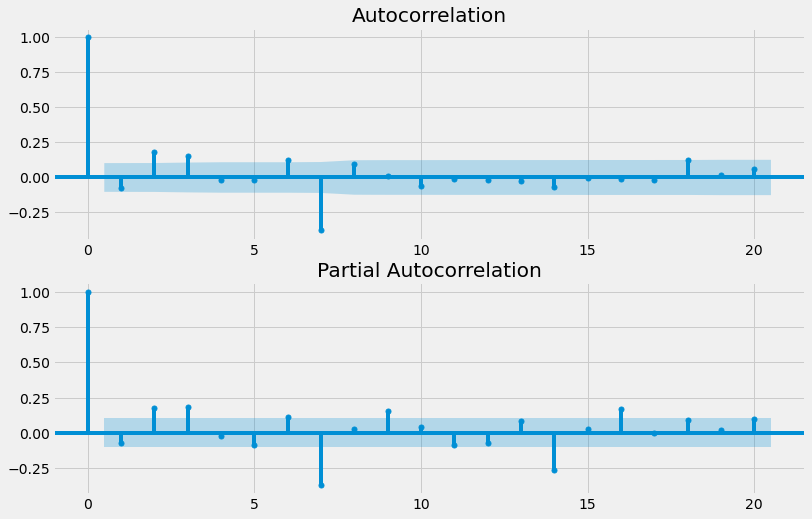

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_cases_diff,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_cases_diff,lags=20,ax=ax2)

In [30]:
from statsmodels.tsa.arima_model import ARIMA

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

model = ARIMA(train, order=(2, 0, 2))
results = model.fit(disp=-1)

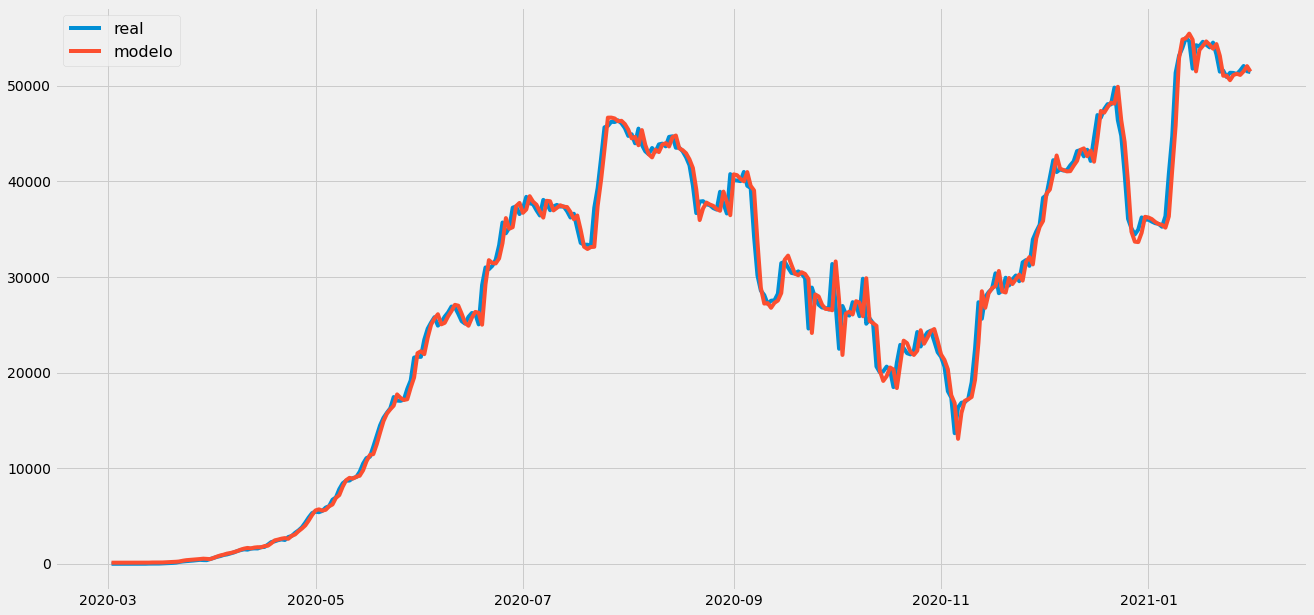

In [31]:
plt.figure(figsize=(20,10))
plt.plot(train['2020-03-02':], label='real')
plt.plot(results.fittedvalues['2020-03-02':], label='modelo')
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [32]:
fitted = model.fit(disp=5)  

# Forecast
fc, se, conf = fitted.forecast(len(test))

# Avaliando o modelo

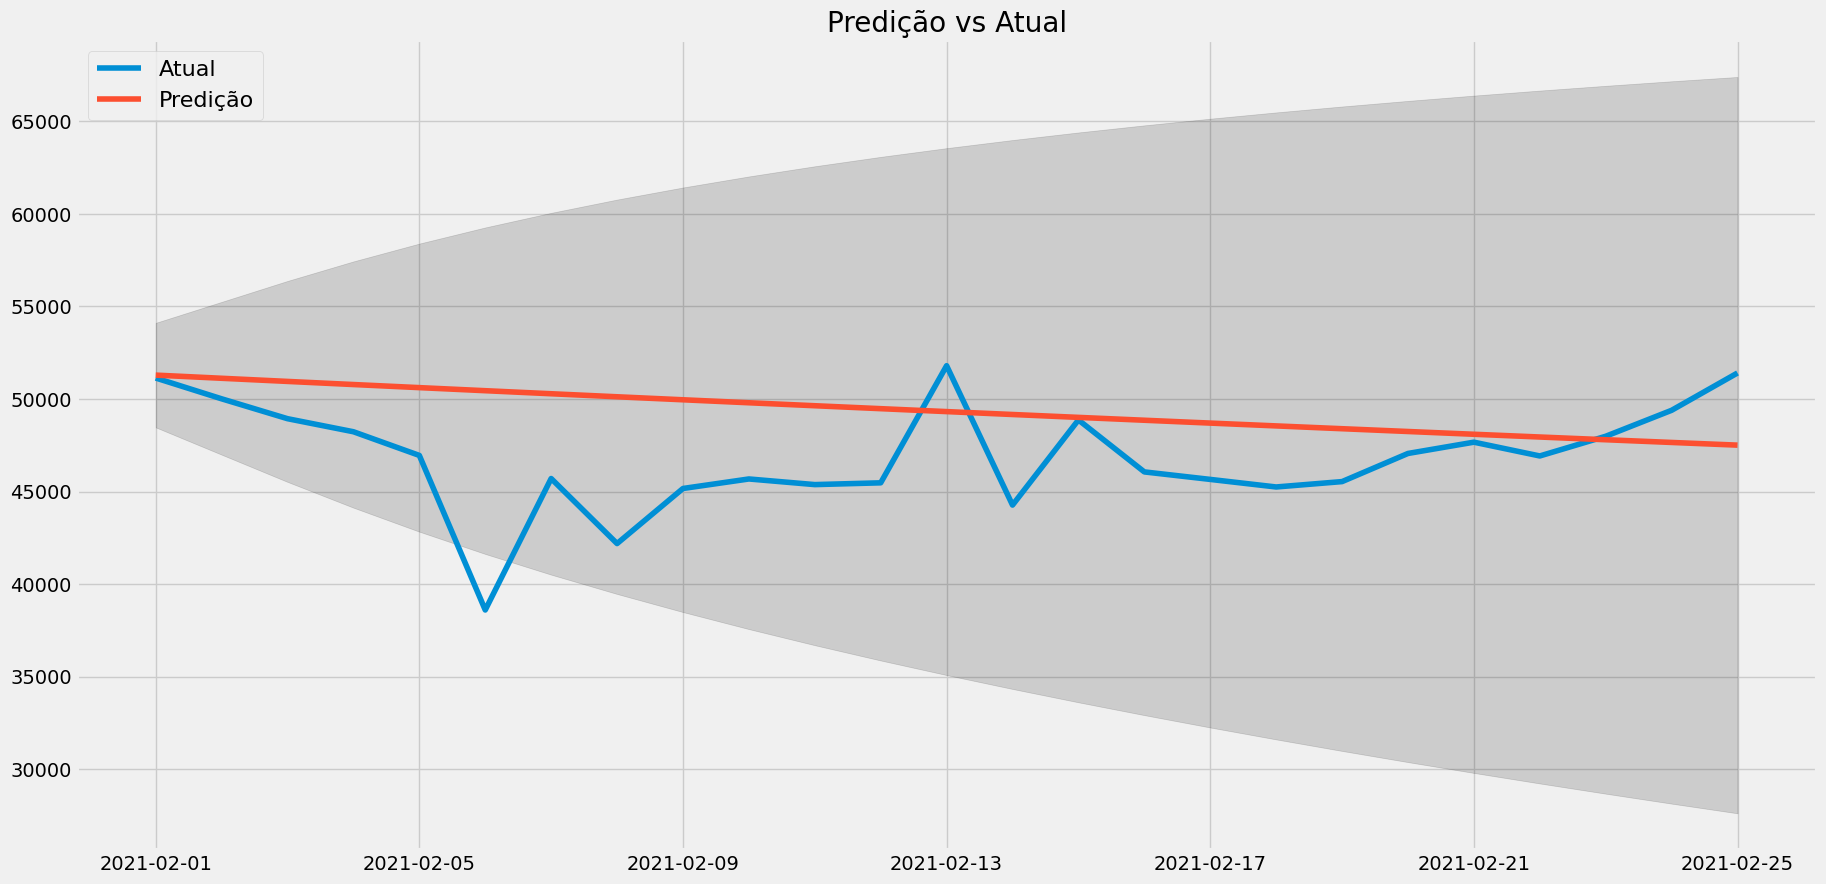

In [33]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,10), dpi=100)
plt.plot(test, label='Atual')
plt.plot(fc_series, label='Predição')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Predição vs Atual')
plt.legend(loc='upper left', fontsize=16)
plt.show()

In [34]:
forecast = pd.DataFrame(fc_series, columns=['new_cases'])

In [35]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'rmse':rmse})

In [36]:
forecast_accuracy(forecast.new_cases, test.new_cases_smoothed)

{'mape': 0.07063610763908229,
 'me': 2495.589796784853,
 'rmse': 4053.416691800289}

## Março de 2021

In [37]:
warnings.filterwarnings("ignore") 

new_model = ARIMA(new_cases_smoothed, order=(2, 0, 2))
new_results = new_model.fit(disp=0)

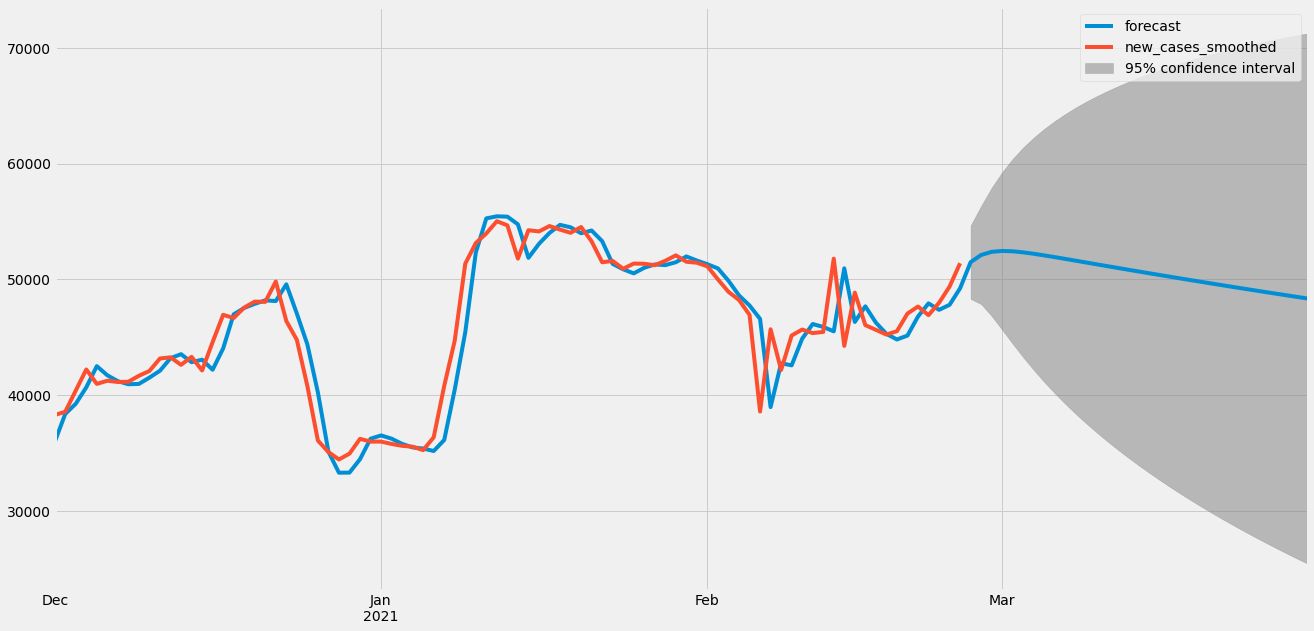

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
fig = new_results.plot_predict(start='2020-12-01', end='2021-03-30', ax=ax)
plt.show()